##### Importing libraries and functions
*Here I import necessary libraries and functions*

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import pandas as pd
import numpy as np

from scipy.stats import ttest_ind
from src.io_utils import load_data, data_check
from src import metrics as mtr
from src import viz as Viz

In [2]:
np.random.seed(42)

##### Loading data
*Here I am loading data so that I can work with the data in the analysis*

In [3]:
df = load_data()

##### Checking data
*Here I check data for: missing, duplicated, unique values.
I also print first 5 rows, to see how table looks.*

In [4]:
data_check(df)

First 5 rows:
   id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
0   1   57   F   168.9    65.8        141.8         4.58     No        0
1   2   47   M   180.4    95.9        144.8         5.18    Yes        0
2   3   59   F   169.9    82.2        151.7         6.16     No        0
3   4   72   M   157.7    93.1        151.0         6.63     No        0
4   5   46   M   192.6   104.1        144.1         5.21     No        0

Missing values:
id             0
age            0
sex            0
height         0
weight         0
systolic_bp    0
cholesterol    0
smoker         0
disease        0
dtype: int64

Duplicated values:
0

Unique values:
800 800


### Table of mean, median, minimum and maximum values for: age, weight, height, blood pressure and cholesterol.
*Here I calculate average, median, maximum, minimum values for age, weight, height, blood pressure, cholesterol.*

In [5]:
display(mtr.counting_analys(df))

,Mean,Median,Max,Min
age,49.0,50.0,90.0,18.0
weight,73.0,73.0,114.0,34.0
height,172.0,171.0,200.0,144.0
systolic_bp,149.0,149.0,186.0,107.0
cholesterol,5.0,5.0,8.0,2.0


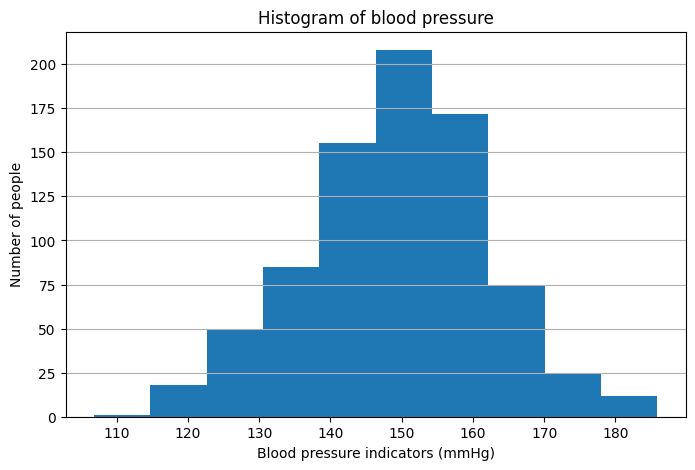

Help on function blodtryck_hist in module src.viz:

blodtryck_hist(df)
    Histogram of blood pressure



In [6]:

Viz.blodtryck_hist(df)
help(Viz.blodtryck_hist)

## Blood pressure histogram
*The blood pressure histogram shows the participants' blood pressure.*  
Most people have a blood pressure between 140 mmHg and 160 mmHg, while the average pressure is about 149 mmHg.   
The highest recorded value is 186 mmHg and the lowest is 107 mmHg.

In [7]:
analyzer = mtr.HealthAnalyser(df)
print(f"Average blood pressure is: {analyzer.mean_bp():.2f} mgHg.")
print("\nPercentage of smokers and non-smokers:")
for i, value in analyzer.smokers_percent().items():
    print(f"{i}: {value:.2f} %")
print(f"\nAverage percentage of people having the disease is {analyzer.disease_percent()} %.")

Average blood pressure is: 149.18 mgHg.

Percentage of smokers and non-smokers:
No: 73.38 %
Yes: 26.62 %

Average percentage of people having the disease is 5.875 %.


### Linear regression
*Linear regression shows how blood pressure is related to age and weight.*

In [8]:
print(f"Linear regression: predicting blood pressure from age and weight")
model = mtr.regression_age_bp(df)

Linear regression: predicting blood pressure from age and weight
Slope for age: 0.54
Slope for weight: 0.18
Intercept: 109.50


*Slope for age: 0.54 and slope for weight: 0.18* show how blood pressure changes when age and weight increases.   
*Positive slope* means that blood pressure increases as age and weight increases.   
*Intercept: 109.50* is the starting value for predicted blood pressure.

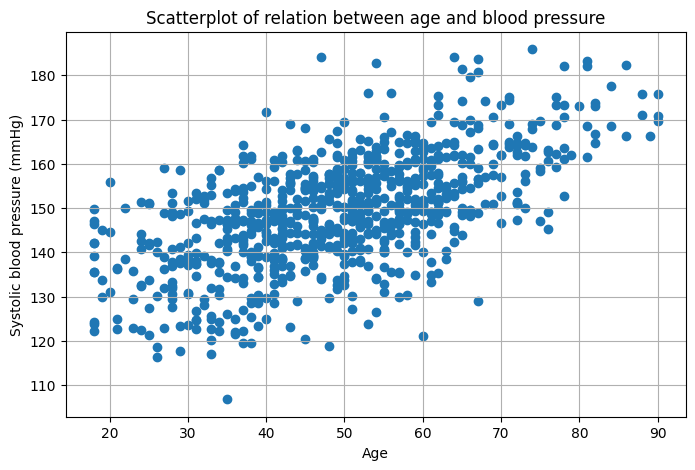

In [9]:
Viz.relation_age_bp(df)

### Scatterplot of relation between age and blood pressure
*This scatterplot shows how blood pressure changes with age.*   
The scatterplot shows that older people have higher blood pressure than younger people.  
This also confirms results from previous regression analysis *"Predicting blood pressure from age and weight"*.


### Table of weight statistics by gender (count, mean, std, min, quartiles, max)
*Here I compare weight statistics for men and women.*

In [10]:
df.groupby('sex')['weight'].describe().round()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,403.0,67.0,12.0,34.0,59.0,67.0,74.0,107.0
M,397.0,80.0,13.0,44.0,71.0,79.0,88.0,114.0


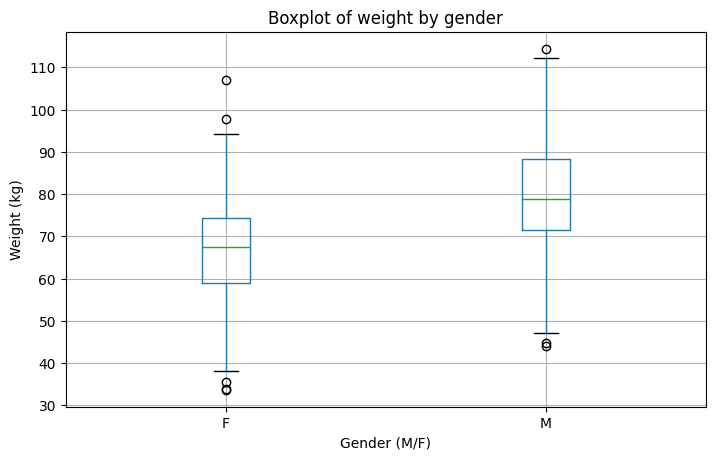

In [11]:
Viz.weight_by_gender(df)

## Boxplot of weight by gender
*The boxplot shows the weight of women and men.*  
Most women weigh between 59 kg and 74 kg, and most men between 71 kg and 88 kg.  
The dots show people with unusually low or high weight.  

### Table of smokers and non-smokers in percentage:
*Here I calculate the percentage of smokers and non-smokers and visualize the result in a bar chart.*

No: 73 %
---------
Yes: 27 %
---------


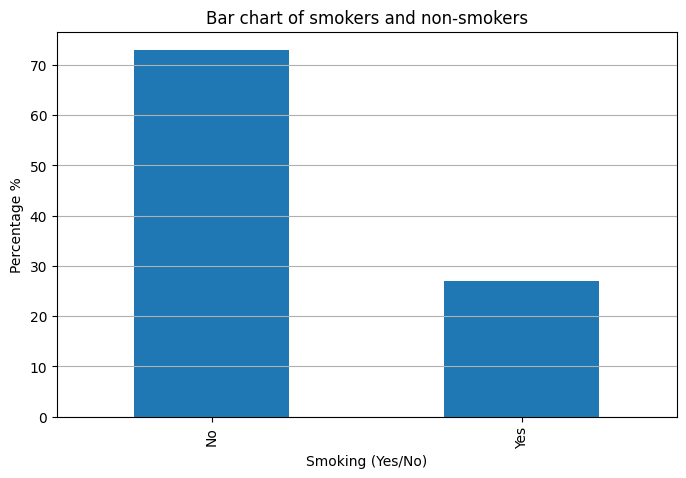

In [12]:
mtr.smokers_nosmokers(df)
Viz.smokers_diagram(df)

## Bar chart of smokers and non-smokers
*The bar chart shows the percentage of smokers and non-smokers.*   
27 % of the participants smoke, while 73 % do not smoke.

### Table of people with and without disease in percentage:
*Here I calculate how many people have disease and how many do not, shown in percentages.*

In [13]:
mtr.disease_prc(df)   

,Percentage of disease:
disease,
0,94.12
1,5.88


"Table of people with and without disease in percentage" shows that approximately 5.88 % of the people have the disease.  
*Where 0 means "Does not have disease" and 1 means "Has disease".*

In [14]:
result = mtr.simulating_disease(df)

Simulated disease mean: 5.60 %



The real dataset shows that approximately 5.88 % of people have the disease.  
Simulations for 1000 people showed a result of approximately 5.60 %.  
The difference is -0.28 %, which shows, that simulated value is very close to the real proportion.  

### Confidence Interval (95%)
*Calculating 95% Confidence Interval to see the range of the average blood pressure.*

In [15]:
ci_low, ci_high = mtr.ci_normal(df)

The mean blood pressure is: 149.18 mmHg.
The 95% confidence interval is: 148.29, 150.07.


### Hypothesis testing (t-test)
*Testing if smokers have higher blood pressure than non-smokers using t-test.*

In [16]:
smokers = df[df['smoker'] == "Yes"] 
non_smokers = df[df['smoker'] == "No"]
smokers.head()
non_smokers.head()
t_stat, p_val = ttest_ind(smokers['systolic_bp'], non_smokers['systolic_bp'], equal_var=False)
print(f"t test statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.3f}")

t test statistic: 0.450
p-value: 0.653


### Hypothesis

H<sub>0</sub>: smokers = non-smokers.  

H<sub>1</sub>: smokers > non-smokers.

### Question
Is the mean blood pressure higher for smokers than for non-smokers?  

#### Answer
The p-value (0.326) is larger than 0.05.  
We cannot reject the null hypothesis H<sub>0</sub>, so we do not have evidence that smokers have higher blood pressure than non-smokers.